# Analysis of the US Baby Names from 1946 to 2016

This sample Python 3 notebook uses Data.gov Baby Names from Social Security Card Applications-National Level Data to analyse the following:
- The changes in the usage of names over time
- Analysis of unisex names and their prevalence
- The changes in the most popular names over time

Dataset found here: https://catalog.data.gov/dataset/baby-names-from-social-security-card-applications-national-level-data

Import the required libraries that we are going to use later.

In [1]:
import os
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
%matplotlib inline

### Data Preparation

The raw data was formatted in several .txt files with the names, sex and number of people with that name, each year having its own file. I began by adding the yearto the end of each line in each file, then combining these file into one large text file. Lastly I converted this file into a csv file for easier analysis

Setting directories and creating a new directory to contain the formatted data.

In [2]:
cwd = os.getcwd()
os.chdir(cwd)
destination = ("new")

if not os.path.exists(destination):
    os.makedirs(destination)

Add the year to the end of each line of each file

In [3]:
directory = os.listdir('US Baby Names')


for file in directory:
    year = file[3:7]
    yearStr = "," + year
    newFile = destination + "/" + year + ".txt"
    file = "US Baby Names/" + file
    with open(file, 'r') as istr:
        with open(newFile, 'w+') as ostr:
            for i, line in enumerate(istr):
                line = line.rstrip('\n')
                line += yearStr
                print(line, file=ostr)
    

Create a new master text file and put it in its own directory

In [4]:
os.chdir(cwd)
masterDestination = ("master")

if not os.path.exists(masterDestination):
    os.makedirs(masterDestination)

masterFile = open('master/yobAll.txt', 'w+')
masterFile.close()

Add all the individual files to the master file

In [5]:
directory2 = os.listdir('new')

for file in directory2:
    masterFile = open('master/yobAll.txt', 'a')
    file = "new/" + file
    currFile = open(file, 'r')
    masterFile.write(currFile.read())

Now convert the master file into a csv

In [6]:
with open('master/yobAll.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(",") for line in stripped if line)
    with open('master/yobAll.csv', 'w+') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('Name', 'Sex', "Number", "Year"))
        writer.writerows(lines)


### Data Collection

Set the file to the master we prepared earlier

In [7]:
file = "master/yobAll.csv"

Ensure the file exists

In [8]:
if not os.path.exists(file):
    print("Missing dataset file")
else:
    print("Succesfully found file")

Succesfully found file


Next let's load and represent the CSV data using a Pandas DataFrame.

In [9]:
df_full = pd.read_csv(file)

We can look at a sample of the data:

In [10]:
df_full.head(5)

,Name,Sex,Number,Year
0,Mary,F,67465,1946
1,Linda,F,52709,1946
2,Patricia,F,46297,1946
3,Barbara,F,45121,1946
4,Carol,F,34282,1946


### Data Preparation

We can see that the notebook covers a range of years. We will only consider the latest data in the file - i.e. the names from 2016.

In [11]:
df1 = df_full[df_full['Year'] == 2016].copy()

In [12]:
df1.head()

,Name,Sex,Number,Year
1437670,Emma,F,19414,2016
1437671,Olivia,F,19246,2016
1437672,Ava,F,16237,2016
1437673,Sophia,F,16070,2016
1437674,Isabella,F,14722,2016


In [13]:
df1["Name"].unique()

array(['Emma', 'Olivia', 'Ava', ..., 'Zyahir', 'Zyel', 'Zylyn'], dtype=object)

We can also get a brief statistical overview of the data, including the types:

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32868 entries, 1437670 to 1470537
Data columns (total 4 columns):
Name      32868 non-null object
Sex       32868 non-null object
Number    32868 non-null int64
Year      32868 non-null int64
dtypes: int64(2), object(2)
memory usage: 1.3+ MB


#### Missing values

How many missing values are there?

In [15]:
df1.isnull().sum()

Name      0
Sex       0
Number    0
Year      0
dtype: int64

As we can see, the dataset captures a lot of information about US Baby names from 1880 to 2016 and we can see there's no problems with missing data or wrong data types.

We now begin analysis of the data

### Analysing the Data

#### Overview of the data

Here, we looked at the basics of the data.
- What are the unique values?
- How many unique names are there in the dataset?

In [16]:
df_full["Name"].unique()

array(['Mary', 'Linda', 'Patricia', ..., 'Zimo', 'Zyahir', 'Zylyn'], dtype=object)

In [17]:
df_full["Name"].nunique()

90630

#### Differences between boys and girls names

Here we split the data into two sets, boys and girls and performed analysis on each.
- What are the most popular girls names of all time?
- What are the most popular boys names of all time?

We split the dataset into boys and girls names

In [18]:
df_girlsNames = df_full[df_full['Sex'] == "F"].copy()
df_girlsNames.head(5)

,Name,Sex,Number,Year
0,Mary,F,67465,1946
1,Linda,F,52709,1946
2,Patricia,F,46297,1946
3,Barbara,F,45121,1946
4,Carol,F,34282,1946


In [19]:
df_boysNames = df_full[df_full['Sex'] == "M"].copy()
df_boysNames.head(5)

,Name,Sex,Number,Year
5686,James,M,87425,1946
5687,Robert,M,84137,1946
5688,John,M,79259,1946
5689,William,M,60038,1946
5690,Richard,M,58862,1946


We then grouped the names together and added all the numbers across the years to reveal the most popular names across the 137 years.

In [20]:
top10GirlsNames = df_girlsNames.groupby(['Name'])['Number'].sum()
top10GirlsNames.nlargest(10)

Name
Mary         1617673
Jennifer     1462332
Linda        1221227
Elizabeth    1102639
Patricia     1043285
Jessica      1041271
Susan         996504
Lisa          962976
Karen         885364
Sarah         875797
Name: Number, dtype: int64

In [21]:
top10BoysNames = df_boysNames.groupby(['Name'])['Number'].sum()
top10BoysNames.nlargest(10)

Name
Michael        4068411
James          3193287
David          3074388
John           3042423
Robert         2903966
William        2323124
Christopher    1999427
Joseph         1773517
Daniel         1714247
Richard        1649757
Name: Number, dtype: int64

We see that Mary is the most popular girls' name while James is the most popular boys' name

#### A further look at the name Mary

I decided to take a further look at the name Mary and found some surprising information.
- Analysis of the name Mary as used for boys

In [22]:
df_full[df_full["Name"] == "Mary"].nunique()

Name        1
Sex         2
Number    119
Year       71
dtype: int64

Strangely, we see that Mary has been given to both boys and girls.

In [23]:
df_boysNames[df_boysNames["Name"] == "Mary"].tail(5)

,Name,Sex,Number,Year
1091795,Mary,M,10,2005
1125536,Mary,M,10,2006
1160290,Mary,M,10,2007
1335640,Mary,M,6,2012
1403870,Mary,M,5,2014


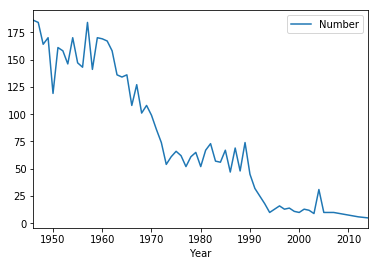

In [24]:
ts = df_boysNames[df_boysNames["Name"] == "Mary"]
ts.plot(["Year"])

In [25]:
df_boysNames[df_boysNames["Name"] == "Mary"].sort_values(by=["Number"], ascending=False).head(5)

,Name,Sex,Number,Year
6155,Mary,M,186,1946
16301,Mary,M,184,1947
123825,Mary,M,184,1957
147121,Mary,M,170,1959
90004,Mary,M,170,1954


We see up to 2014, Mary was given to boys also. As it boys name it peaked between the 1950s and 1960s and disappeared after 2014

#### Analysing Unisex Names

We decided to look further into the topic of unisex names.
- What names have been used for boys and girls?
- How many unisex names are there?
- What percentage of names in the dataset have been unisex at some point?

We grouped the names by sex then displayed only the ones that had over one unique sex

In [26]:
df_full.groupby(["Name"])["Sex"].unique().head(10)

Name
Aaban           [M]
Aabha           [F]
Aabid           [M]
Aabir           [M]
Aabriella       [F]
Aada            [F]
Aadam           [M]
Aadan           [M]
Aadarsh         [M]
Aaden        [M, F]
Name: Sex, dtype: object

In [27]:
df_unisexNames = df_full.groupby(["Name"])["Sex"].nunique()
df_2 = df_unisexNames[df_unisexNames > 1]
df_2.head(6805).tail(10)

Name
Nolan     2
Nole      2
Nolen     2
Nollie    2
Nolyn     2
Noname    2
Noor      2
Nor       2
Nora      2
Norah     2
Name: Sex, dtype: int64

In [28]:
df_2.count()

9524

In [29]:
(df_2.count() / df_full["Name"].nunique()) * 100

10.50866159108463

Almost 11% of names have at some point been unisex

#### The Changes in the most popular names over time

We decided to focus in on the differences between popular names in 1880 and 2016.
- What are the most popular girls names in 1880 vs 2016?
- What are the most popular boys names in 1880 vs 2016?
- What is the difference in trends between the most popular names in 1880 vs 2016

As we saw before, the Top Ten Girls names of all time are:

In [30]:
top10GirlsNames.nlargest(10)

Name
Mary         1617673
Jennifer     1462332
Linda        1221227
Elizabeth    1102639
Patricia     1043285
Jessica      1041271
Susan         996504
Lisa          962976
Karen         885364
Sarah         875797
Name: Number, dtype: int64

Let's compare this to the Top Ten Girls names in 2016:

In [31]:
df_girlsNames2016 = df1[df1['Sex'] == "F"].copy()
top10GirlsNames2016 = df_girlsNames2016.groupby(['Name'])['Number'].sum()
top10GirlsNames2016.nlargest(10)

Name
Emma         19414
Olivia       19246
Ava          16237
Sophia       16070
Isabella     14722
Mia          14366
Charlotte    13030
Abigail      11699
Emily        10926
Harper       10733
Name: Number, dtype: int64

And to The Ten Girl Names in 1946:

In [42]:
df2 = df_full[df_full['Year'] == 1946].copy()

In [43]:
df_girlsNames1946 = df2[df2['Sex'] == "F"].copy()
top10GirlsNames1946 = df_girlsNames1946.groupby(['Name'])['Number'].sum()
top10GirlsNames1946.nlargest(10)

Name
Mary        67465
Linda       52709
Patricia    46297
Barbara     45121
Carol       34282
Sandra      31691
Nancy       28343
Susan       28268
Sharon      27824
Judith      22307
Name: Number, dtype: int64

Let's look at the differences trends between the top girls name of 1946 and the top girls name of 2016

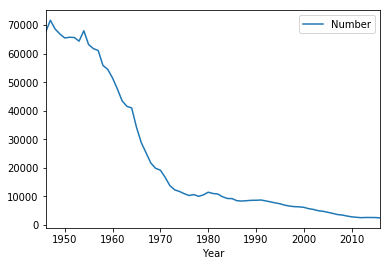

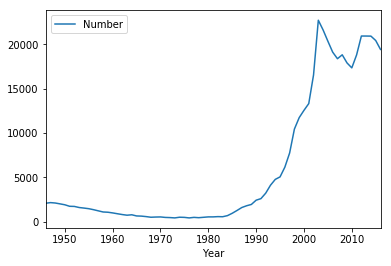

In [45]:
ts1 = df_girlsNames[df_girlsNames["Name"] == "Mary"]
ts2 = df_girlsNames[df_girlsNames["Name"] == "Emma"]
ts1.plot(x=["Year"])
ts2.plot(x=["Year"])

As we can see, Mary has been consistently popular from 1990 to 1980 with popularity only starting to drop in the last 30 years.

Emma, on the other hand, has only been rising since 1980.

Similarly with boys names, here are the most popular boys names of all time:

In [46]:
top10BoysNames.nlargest(10)

Name
Michael        4068411
James          3193287
David          3074388
John           3042423
Robert         2903966
William        2323124
Christopher    1999427
Joseph         1773517
Daniel         1714247
Richard        1649757
Name: Number, dtype: int64

Let's look at the Top Ten Boys Names for 2016

In [47]:
df_boysNames2016 = df1[df1['Sex'] == "M"].copy()
top10BoysNames2016 = df_boysNames2016.groupby(['Name'])['Number'].sum()
top10BoysNames2016.nlargest(10)

Name
Noah        19015
Liam        18138
William     15668
Mason       15192
James       14776
Benjamin    14569
Jacob       14416
Michael     13998
Elijah      13764
Ethan       13758
Name: Number, dtype: int64

Similarly for 1946:

In [48]:
df_boysNames1946 = df2[df2['Sex'] == "M"].copy()
top10BoysNames1946 = df_boysNames1946.groupby(['Name'])['Number'].sum()
top10BoysNames1946.nlargest(10)

Name
James      87425
Robert     84137
John       79259
William    60038
Richard    58862
David      46435
Michael    41182
Thomas     38865
Charles    38201
Ronald     31850
Name: Number, dtype: int64

Let's look at the differences trends between the top boys name of 1946 and the top boys name of 2016

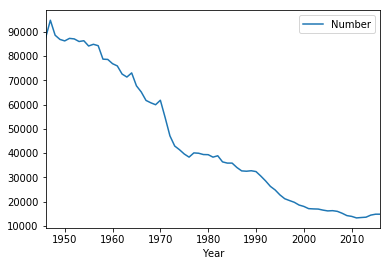

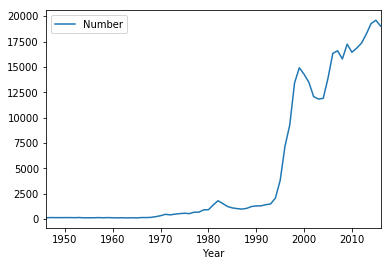

In [50]:
ts1 = df_boysNames[df_boysNames["Name"] == "James"]
ts2 = df_boysNames[df_boysNames["Name"] == "Noah"]
ts1.plot(x=["Year"])
ts2.plot(x=["Year"])


As we can see from these graphs, James has been consistantly popular from 1910 to 1960 then experienced a rapid decline to 1970 and then a slower decline to 2016.

Meanwhile, Noah has only experienced a spike in popularity in the last 20 years.